In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from tqdm import tqdm

### Fact 1
For any fixed $n \times p$ matrix $A$ the function $E(A,B)$ is convex in the coefficients of $B$ and attains its minimum for any $B$ satisfying the equation
\begin{equation}
    A^\intercal AB\Sigma_{XX} = A^\intercal \Sigma_{YX}
\end{equation}
If $\Sigma_{XX}$ is invertible and A is full rank $p$, then $E$ is strictly convex and has unique minimum reached when:
\begin{equation}\tag{3}
    B = \hat{B}(A) = (A^\intercal A)^{-1} A^\intercal \Sigma_{YX}\Sigma_{XX}^{-1}
\end{equation}
In the auto-associative case, (3) becomes 
\begin{equation}\tag{3'}
    B = \hat{B}(A) = (A^\intercal A)^{-1} A^\intercal 
\end{equation}

In order to plot the function E varying the parameter B we proceed by taking two vectors of the size of the number of datapoints for which showing the function E. They will be on the plane x-y while the output of the function E will be plotted as the z variable. If we fix A, the function E becomes a function of B which means that vary by varying in input two vectors in $\mathbb{R}^3$. In this case the vectors in input will have the first two components corresponding to the x-axis and y-axis defined earlier and 0 as z-axis in order to have all points lying on the x-y plane and use the third dimension for E.

In [21]:
# linear encoder and decoder
A = np.array([[1], [2]]) 
B = np.array([[3,4]])

# input data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# error function to minimize
E = lambda A,B : np.sum(np.linalg.norm(X - X @ A @ B)) 
print(A.shape, B.shape, X.shape)

(2, 1) (1, 2) (4, 2)


In [22]:
E(A,B)

140.99645385611655

In [23]:
E(A,np.linalg.inv(A.T @ A) @ A.T)     

3.3466401061363023

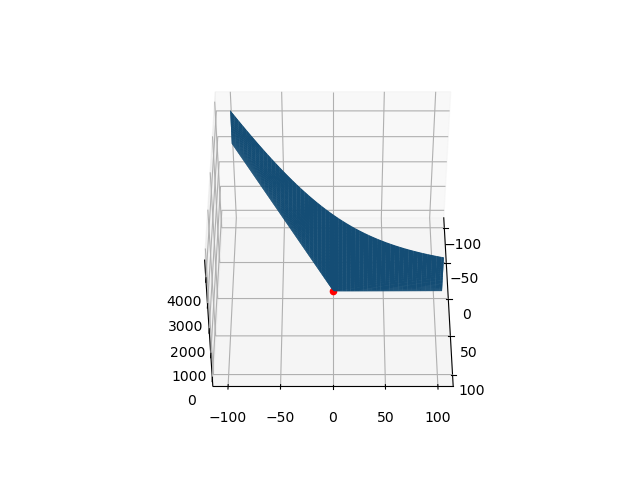

In [24]:
%matplotlib ipympl
x_axis = np.linspace(-100, 100, 100)
y_axis = np.linspace(-100, 100, 100)

#for x_value, y_value in zip(x_axis, y_axis):
#    print(x_value, y_value, E(np.array([[x_value], [y_value]]), B))

Z = np.array([[E(A,np.array([[x_value, y_value]])) for x_value in x_axis] for y_value in y_axis])


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot_surface(x_axis, y_axis, Z) #, cmap=cm.coolwarm, linewidth=4, antialiased=False

min_point = np.linalg.inv(A.T @ A) @ A.T
ax.scatter3D(min_point[0][0], min_point[0][1], E(A,min_point), c='r', marker='o')
ax.view_init(45, 0)



In [25]:
min_point = np.linalg.inv(A.T @ A) @ A.T
min_point[0][0], min_point[0][1], E(A,min_point)

(0.2, 0.4, 3.3466401061363023)

In [26]:
A

array([[1],
       [2]])

### Training alternatating fixed A and B
The best value for $B$ with fixed $A$ is: $$B^* = B(A) = (A^\intercal A)^{-1} A^\intercal$$
While the best value for $A$ with fixed $B$ is: $$A^* = A(B) = \Sigma_{XX} B^\intercal(B\Sigma_{XX}B^\intercal)^{-1}$$

In [27]:
image = plt.imread('Lena.jpg').astype(np.float32)
image.shape

(256, 256)

In [28]:
def randomizeWeights(in_out_shape, hidden_shape):
    np.random.seed(0)
    n = in_out_shape # input shape of the autoencoder
    p = hidden_shape

    # linear transformation matrixes
    B = np.random.randn(n,p)
    A = np.random.randn(p,n)
    print(A.shape, B.shape)
    return A, B

In [29]:
plt.imshow(image,cmap='gray')

In [30]:
def dissimilarity(A,B, original):
    return np.sum(np.linalg.norm(original - original @ B @ A, ord='fro'))

In [31]:
def train(in_out_shape, hidden_shape, data, epochs):
    A,B = randomizeWeights(in_out_shape=in_out_shape, hidden_shape=hidden_shape)
    error_history = list()

    for epoch in range(epochs):
        epoch_error = 0
        curr_train_index = np.random.choice(data.shape[0], 1, replace=False)[0]     # choice returns a list, so we need to get the first element
        #print('Current training index:', curr_train_index)  
        #print(epoch, A.shape, B.shape)
        A = np.linalg.inv(B.T @ B) @ B.T
        B = (data[curr_train_index] @ data[curr_train_index].T) @ A.T @ np.linalg.inv((A @ (data[curr_train_index] @ data[curr_train_index].T)) @ A.T)
        for index in range(data.shape[0]):
            epoch_error += np.linalg.norm(data[index] - data[index] @ B @ A, ord='fro')/np.linalg.norm(data[index], ord='fro')
        error_history.append(epoch_error/data.shape[0])
    return A, B, error_history


In [32]:
image_dim = list()
image_dim.append(image)
image_dim = np.array(image_dim)
image_dim.shape

(1, 256, 256)

  0%|          | 0/8 [00:00<?, ?it/s]

(16, 256) (256, 16)
(32, 256) (256, 32)
(48, 256) (256, 48)


 38%|███▊      | 3/8 [00:00<00:00, 11.70it/s]

(64, 256) (256, 64)
(96, 256) (256, 96)


 75%|███████▌  | 6/8 [00:01<00:00,  3.67it/s]

(128, 256) (256, 128)
(192, 256) (256, 192)


 88%|████████▊ | 7/8 [00:01<00:00,  4.25it/s]

(240, 256) (256, 240)


100%|██████████| 8/8 [00:01<00:00,  4.01it/s]


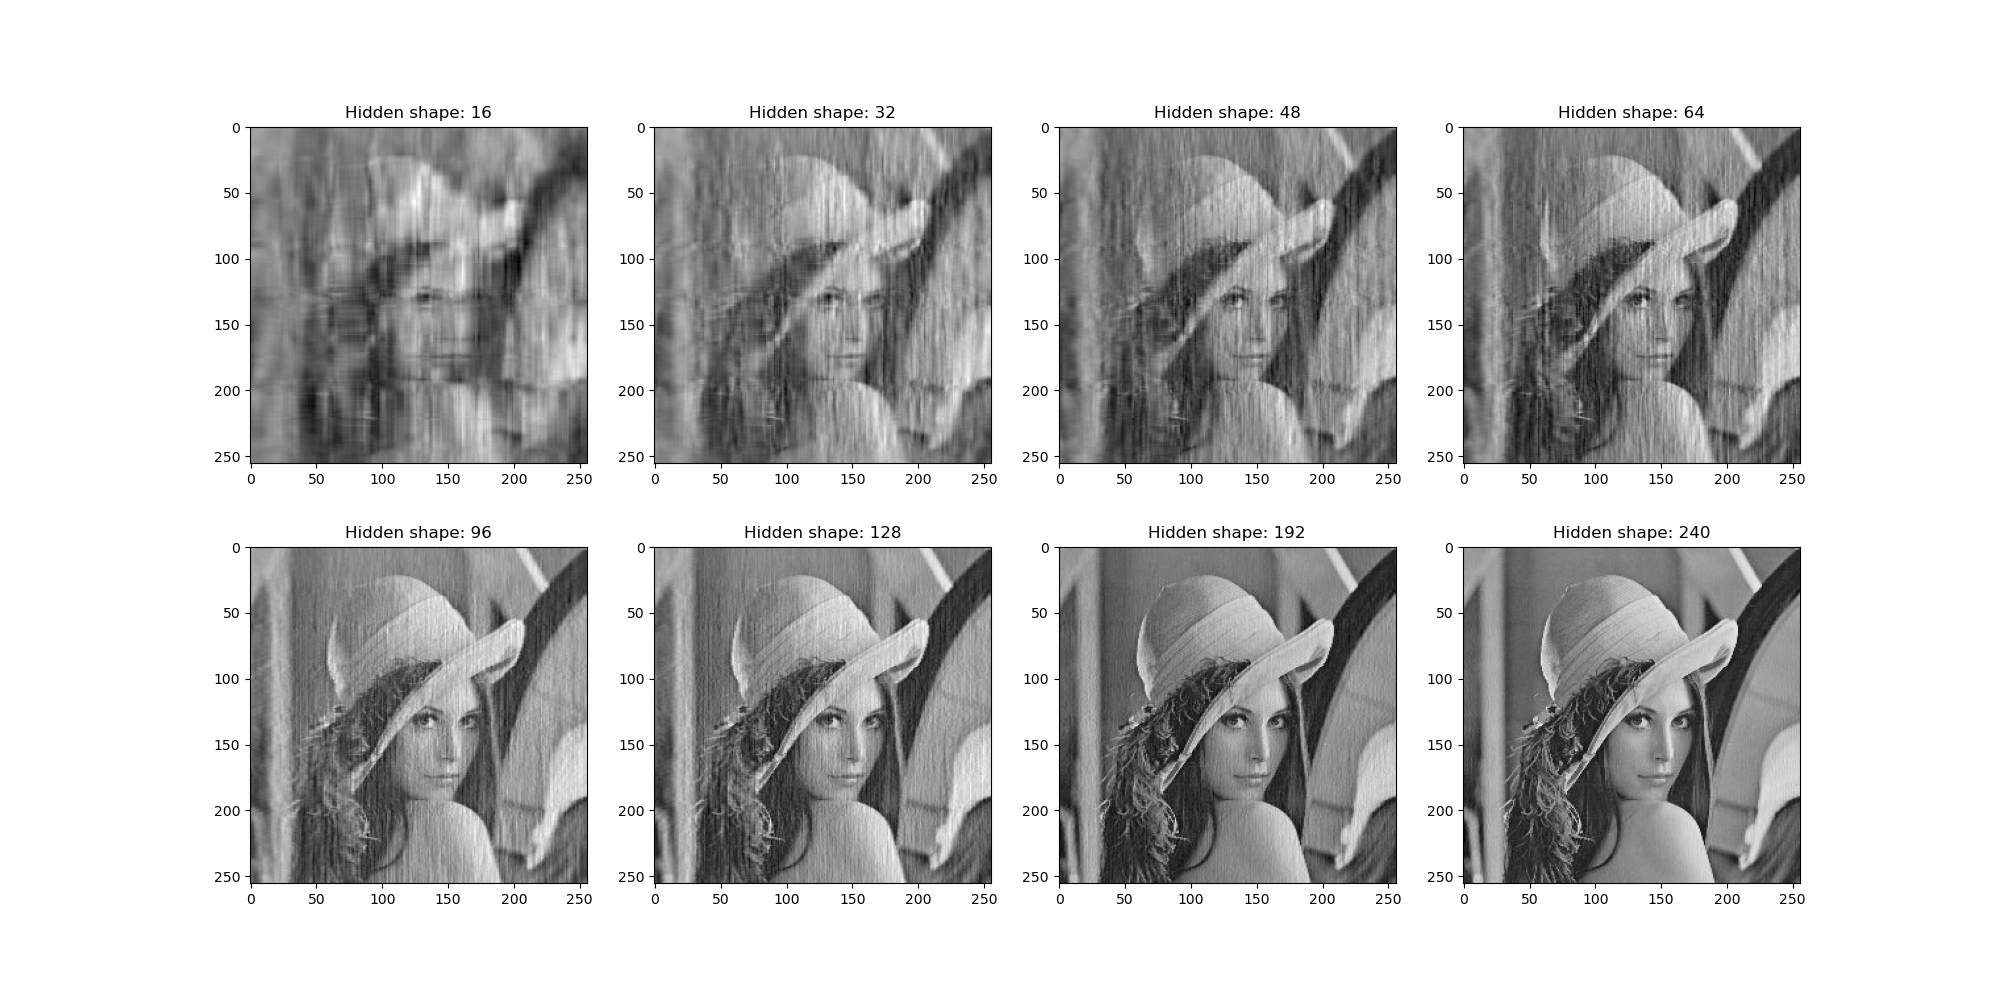

In [33]:
hidden_shapes_1 = [16, 32, 48, 64, 96, 128, 192, 240]
fig, axs = plt.subplots(ncols=int(len(hidden_shapes_1)/2), nrows=2, figsize=(20, 10))
axs = axs.flatten()

for shape in tqdm(hidden_shapes_1):
    A,B, error_history = train(in_out_shape=(image.shape[0]), hidden_shape=shape, data=image_dim, epochs=2)
    #plt.semilogy(error_history, label=f'Hidden shape: {shape}')
    #plt.legend()
    axs[hidden_shapes_1.index(shape)].imshow(image @ B @ A, cmap='gray')
    axs[hidden_shapes_1.index(shape)].set_title(f'Hidden shape: {shape}')

Let's now try apply this kind of training to a dataset of similar images, in order to have the autoencoder understanding the core features characterizing the images. 

In [34]:
# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt('./mnist_train_small.csv', delimiter=',')
data.shape
labels_full = data[:,0]
A_full = data[:,1:].transpose()
labels_full.shape, A_full.shape
A_filtered = A_full[:,labels_full == 5]

In [35]:
plt.imshow(A_filtered[:,1].reshape(28,28), cmap='gray')

In [36]:
A_filtered.shape

(784, 1761)

We transform the dataset from the usual shape to a stack of images in their matrix shape since the autoencoder works with matrices rather than column vectors.  

In [37]:
images_stacked = list()
for images_index in range(A_filtered.shape[1]):
    images_stacked.append(A_filtered[:,images_index].reshape(28,28))

images_stacked = np.array(images_stacked)
images_stacked.shape

(1761, 28, 28)

In [38]:
hidden_shapes_2 = [2,4,8,10,16,20,24]

for shape in tqdm(hidden_shapes_2):
    _, _, error_history = train(in_out_shape=28, hidden_shape=shape, data=images_stacked, epochs=10)
    plt.semilogy(error_history, label=f'Hidden shape: {shape}')
    plt.legend()



  0%|          | 0/7 [00:00<?, ?it/s]

(2, 28) (28, 2)


 14%|█▍        | 1/7 [00:00<00:01,  3.43it/s]

(4, 28) (28, 4)


 29%|██▊       | 2/7 [00:00<00:01,  3.00it/s]

(8, 28) (28, 8)


 43%|████▎     | 3/7 [00:01<00:02,  1.41it/s]

(10, 28) (28, 10)


 57%|█████▋    | 4/7 [00:02<00:02,  1.14it/s]

(16, 28) (28, 16)


 71%|███████▏  | 5/7 [00:04<00:02,  1.01s/it]

(20, 28) (28, 20)


 86%|████████▌ | 6/7 [00:05<00:01,  1.13s/it]

(24, 28) (28, 24)


100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


### Trying to plot the landscape of $E$

In [39]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

dataset = np.random.randn(10, 1)
eigval, eigvec = np.linalg.eig(np.cov(dataset.T))
eigval, eigvec

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

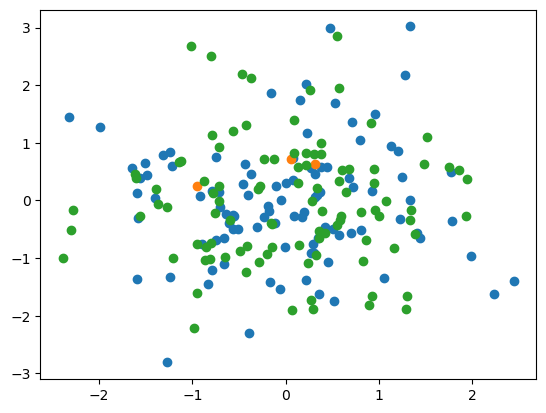

In [ ]:
plt.scatter(dataset[:,0], dataset[:,1])
plt.scatter(eigvec[:,0], eigvec[:,1])
new_dataset = dataset @ eigvec
plt.scatter(new_dataset[:,0], new_dataset[:,1])

In [ ]:
np.sum(dataset - new_dataset)

-3.8367593510761946

## Binary autoencoders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Input matrix')

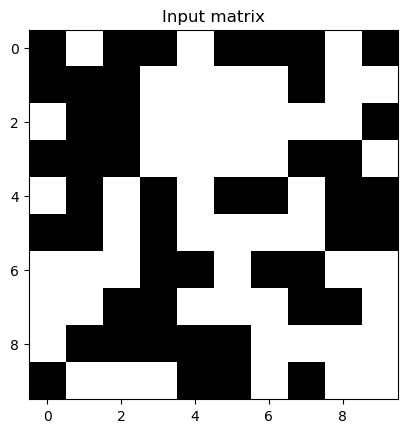

In [ ]:
bin_input = np.random.binomial(1, 0.5, 100)
bin_input = bin_input.reshape(10,10)
plt.imshow(bin_input, cmap='gray')
plt.title('Input matrix')

In [ ]:


def hamming_distance(x, y):
    return np.sum(x != y)

def boolean_function(input_matrix, domain_size):
    np.random.seed(0)
    multiplicative_matrix = np.random.binomial(1, 0.5, (input_matrix.shape[1], domain_size))
    output = input_matrix @ multiplicative_matrix
    for i,j in np.ndindex(output.shape):
        output[i,j] = np.round(output[i,j]/np.max(output))
    return output 

def majority(matrix):
    return np.round(np.mean(matrix, axis=0))

def center_of_gravity(matrix):
    return np.mean(matrix, axis=0)

In [ ]:
bin_input,np.mean(bin_input, axis=0), majority(bin_input)

(array([[0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 0, 1, 1],
        [1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0, 1, 0, 0, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 0, 1, 1]]),
 array([0.5, 0.4, 0.4, 0.4, 0.7, 0.6, 0.7, 0.4, 0.6, 0.6]),
 array([0., 0., 0., 0., 1., 1., 1., 0., 1., 1.]))

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 1]])

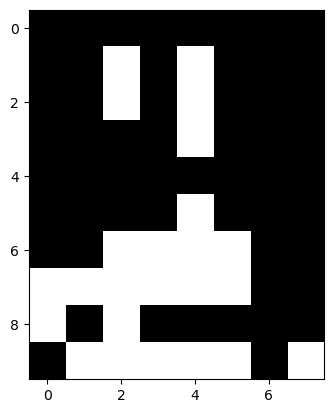

In [ ]:
plt.imshow(boolean_function(bin_input, 8), cmap='gray')
boolean_function(bin_input, 8)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

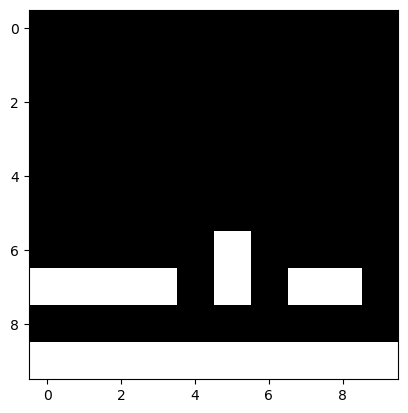

In [ ]:
plt.imshow(boolean_function(boolean_function(bin_input, 8),10), cmap='gray')
boolean_function(boolean_function(bin_input, 8),10)

In [ ]:
hamming_distance(bin_input, boolean_function(boolean_function(bin_input, 8),10))

51

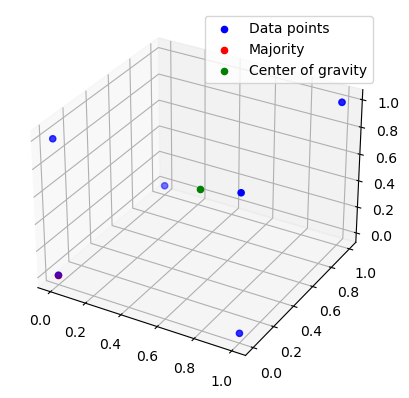

In [ ]:
X = np.array([[0,1,0],[1,1,1], [1,0,0], [0,0,1], [1,1,1], [0,0,0], [0,1,0], [1,0,1]])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2], c='b')
ax.scatter(majority(X)[0],majority(X)[1],majority(X)[2] , '+', c='r')
ax.scatter(center_of_gravity(X)[0],center_of_gravity(X)[1],center_of_gravity(X)[2], 'x', c='g')
ax.legend(['Data points', 'Majority', 'Center of gravity'])

In [ ]:
import plotly.express as px

box = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
box.add_scatter3d(x=[majority(X)[0]], y=[majority(X)[1]], z=[majority(X)[2]], mode='markers', marker=dict(size=10, color='red'), name='Majority'  )
box.add_scatter3d(x=[center_of_gravity(X)[0]], y=[center_of_gravity(X)[1]], z=[center_of_gravity(X)[2]], mode='markers', marker=dict(size=10, color='green'), name='Center of gravity'  )

# Autoencoders using Keras